In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from fbprophet import Prophet
from DatenSammlung import DatenVergangenheitHolen, FeiertageHolen, WetterVorhersageNBG
from DatenVerarbeitung import DatenVerarbeitung

from datetime import date

Importing plotly failed. Interactive plots will not work.
Today's date: 2021-04-24
Today's date: 2021-04-24


In [2]:
today = date.today()

In [3]:
df = DatenVerarbeitung()

start_date and end_date filtering limited to defined periods [<Period.HISTORICAL: 'historical'>, <Period.RECENT: 'recent'>, <Period.NOW: 'now'>]
The combination of kl, daily, now is invalid.
100%|██████████| 1/1 [00:01<00:00,  1.70s/it]
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
WetterVorhersage = WetterVorhersageNBG()

  0%|          | 0/1 [00:00<?, ?it/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   0%|          | 0.00/36.1M [00:00<?, ?iB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   2%|▏         | 736k/36.1M [00:00<00:04, 7.53MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   4%|▍         | 1.44M/36.1M [00:00<00:04, 7.47MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   6%|▌         | 2.15M/36.1M [00:00<00:05, 6.81MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   8%|▊         | 2.81M/36.1M [00:00<00:05, 5.89MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:  10%|▉         | 3.52M/36.1M [00:00<00:05, 6.37MiB/s]
https://opendata.dwd.de/weathe

In [5]:
df_test = df

In [6]:
trainings_zeitraum_von = '2020-8-01'
df_test = df_test.loc[df_test.index>trainings_zeitraum_von].copy()

<AxesSubplot:title={'center':'Trainingsdaten am 2021-04-24'}, xlabel='Date'>

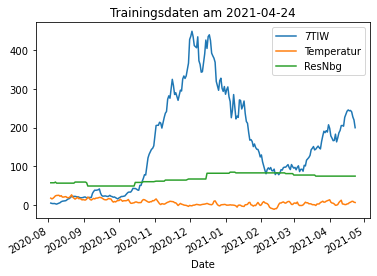

In [7]:
df_test.plot(title='Trainingsdaten am '+str(today))

In [8]:
df_test= df_test.rename(columns={"7TIW": "y"})
df_test = df_test.reset_index()
df_test= df_test.rename(columns={"Date": "ds"})

In [9]:
#df_test

In [10]:
m = Prophet(changepoint_prior_scale=2)
m.add_country_holidays(country_name='DE')
m.add_regressor('Temperatur')
m.add_regressor('ResNbg')
m.fit(df_test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
#WetterVorhersage.head(20)

In [12]:
future = m.make_future_dataframe(periods=10,include_history=False)
future = future.set_index('ds')
#future.tail(20)

In [13]:
future['Temperatur'] = future.join(WetterVorhersage)
future['ResNbg'] = df_test.ResNbg.iloc[-1]
future = future.reset_index()

In [19]:
future.tail(20)

,ds,Temperatur,ResNbg
0,2021-04-24,9.814286,75.0
1,2021-04-25,7.204167,75.0
2,2021-04-26,6.766667,75.0
3,2021-04-27,8.5625,75.0
4,2021-04-28,10.779167,75.0
5,2021-04-29,11.066667,75.0
6,2021-04-30,9.5875,75.0
7,2021-05-01,8.520833,75.0
8,2021-05-02,9.758333,75.0
9,2021-05-03,11.133333,75.0


In [15]:
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

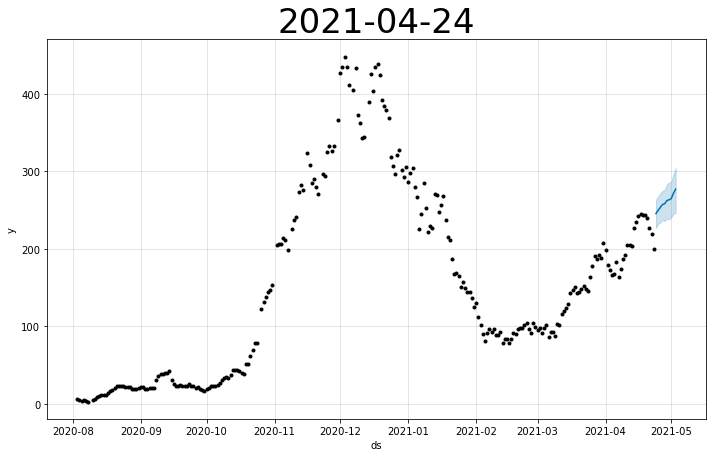

In [16]:
fig = m.plot(forecast)
ax = fig.gca()
ax.set_title(today, size=34)
fig.savefig('Vorhersagen/'+str(today)+'.png')
#plt.close(fig)

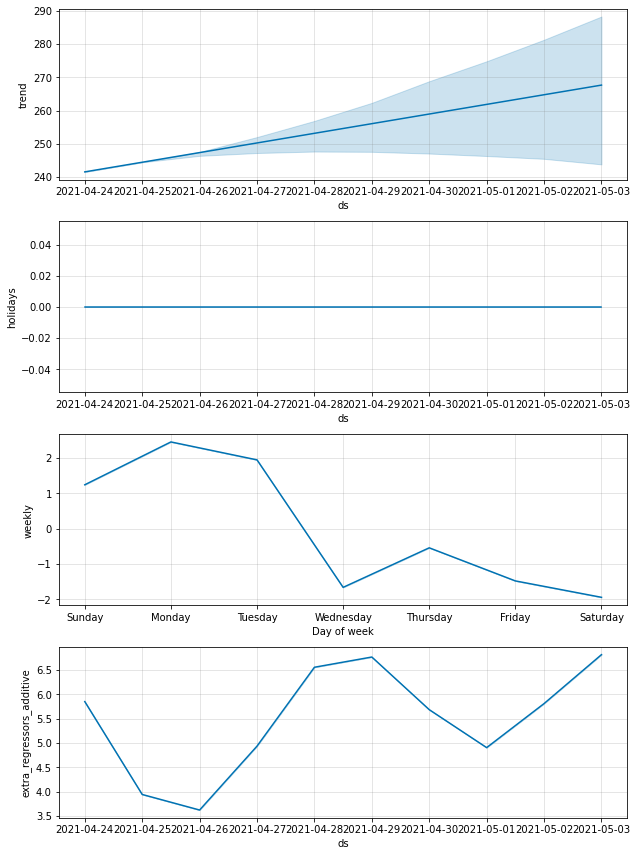

In [17]:
fig2 = m.plot_components(forecast)

In [18]:
import streamlit as st